In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import MaxNLocator# custom tick locators for plots

# matplotlib default customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [4]:
data = pd.read_csv('../processeddata/20161220_eef2k2KO_ps6k_quant1.csv')
data['samplelabel'] = data['samplelabel'].apply(lambda x: x.replace('-',u'– '))
print data

         samplelabel  mean_relativephosindex     stdev     sterr
0               Rich                1.000000  0.385528  0.157391
1              – Leu                0.167937  0.065965  0.026930
2              – Arg                0.308467  0.107050  0.043703
3    EEF2K KO 1 Rich                0.758016       NaN       NaN
4   EEF2K KO 1 – Leu                0.069471       NaN       NaN
5   EEF2K KO 1 – Arg                0.179811       NaN       NaN
6    EEF2K KO 2 Rich                0.869190       NaN       NaN
7   EEF2K KO 2 – Leu                0.113107       NaN       NaN
8   EEF2K KO 2 – Arg                0.183803       NaN       NaN
9    EEF2K KO 3 Rich                0.653960       NaN       NaN
10  EEF2K KO 3 – Leu                0.056548       NaN       NaN
11  EEF2K KO 3 – Arg                0.148779       NaN       NaN


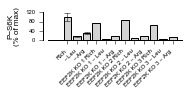

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

xlocations = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

ax.bar(xlocations, data['mean_relativephosindex'][sampleOrder]*100, align='center', color = 'lightgrey' )
ax.errorbar(xlocations, data['mean_relativephosindex'][sampleOrder]*100, 
            data['sterr'][sampleOrder]*100, linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(3) )

#ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(data['samplelabel'][sampleOrder], rotation=45, ha='right')

ax.set_ylabel('P~S6K\n(% of max)')

fig.set_size_inches([2.4,0.5])
fig.savefig('../figures/20160106_eef2k2KO_cols145_ps6k.svg')

#### Same data, averaging together the 3 biological replicates ####

In [8]:
data = pd.read_csv('../processeddata/20161220_eef2kKO_ps6k_quant2_3biorepsaveraged.csv')
data['samplelabel'] = data['samplelabel'].apply(lambda x: x.replace('-',u'– '))
print data

      samplelabel  mean_relativephosindex     stdev     sterr
0            Rich                1.000000  0.385528  0.157391
1           – Leu                0.167937  0.065965  0.026930
2           – Arg                0.308467  0.107050  0.043703
3   EEF2K KO Rich                0.760389  0.107635  0.062143
4  EEF2K KO – Leu                0.079709  0.029637  0.017111
5  EEF2K KO – Arg                0.170798  0.019173  0.011070


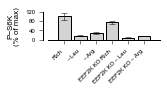

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

sampleOrder = np.array([0,1,2,3,4,5])

xlocations = np.array([0,1,2,3,4,5])

ax.bar(xlocations, data['mean_relativephosindex'][sampleOrder]*100, align='center', color = 'lightgrey' )
ax.errorbar(xlocations, data['mean_relativephosindex'][sampleOrder]*100, 
            data['sterr'][sampleOrder]*100, linestyle='None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(3) )

#ax.set_xlabel('Samples')
ax.set_xticks(xlocations)
ax.set_xticklabels(data['samplelabel'][sampleOrder], rotation=45, ha='right')

ax.set_ylabel('P~S6K\n(% of max)')

fig.set_size_inches([2,0.5])
fig.savefig('../figures/20160106_eef2k2KO_3biorepsAVERAGED_ps6k.svg')